<a href="https://colab.research.google.com/github/ahcamachod/2091-pandas-limpieza-y-tratamiento-de-datos/blob/aula-5/limpieza_y_tratamiento_de_datos_con_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.2 - Exploración inicial

In [ ]:
import pandas as pd

json_bruto = pd.read_json('/content/datos_telecom.json')

json_bruto.head()

,id_cliente,churn,cliente,telefono,internet,cuenta
0,0002-ORFBO,no,"{'genero': 'femenino', 'adulto_mayor': 0, 'par...","{'servicio_telefono': 'sí', 'varias_lineas': '...","{'servicio_internet': 'DSL', 'seguridad_online...","{'contrato': None, 'factura_eletronica': None,..."
1,0003-MKNFE,no,"{'genero': 'masculino', 'adulto_mayor': 0, 'pa...","{'servicio_telefono': 'sí', 'varias_lineas': '...","{'servicio_internet': 'DSL', 'seguridad_online...","{'contrato': 'mensual', 'factura_eletronica': ..."
2,0004-TLHLJ,sí,"{'genero': 'masculino', 'adulto_mayor': 0, 'pa...","{'servicio_telefono': 'sí', 'varias_lineas': '...","{'servicio_internet': 'fibra óptica', 'segurid...","{'contrato': 'mensual', 'factura_eletronica': ..."
3,0011-IGKFF,sí,"{'genero': 'masculino', 'adulto_mayor': 1, 'pa...","{'servicio_telefono': 'sí', 'varias_lineas': '...","{'servicio_internet': 'fibra óptica', 'segurid...","{'contrato': 'mensual', 'factura_eletronica': ..."
4,0013-EXCHZ,sí,"{'genero': 'femenino', 'adulto_mayor': 1, 'par...","{'servicio_telefono': 'sí', 'varias_lineas': '...","{'servicio_internet': 'fibra óptica', 'segurid...","{'contrato': 'mensual', 'factura_eletronica': ..."


In [ ]:
json_bruto['cliente'][0]

{'genero': 'femenino',
 'adulto_mayor': 0,
 'pareja': 'sí',
 'dependientes': 'sí',
 'tiempo_servicio': 9.0}

In [ ]:
pd.json_normalize(json_bruto['cliente']).head()

,genero,adulto_mayor,pareja,dependientes,tiempo_servicio
0,femenino,0,sí,sí,9.0
1,masculino,0,no,no,9.0
2,masculino,0,no,no,4.0
3,masculino,1,sí,no,13.0
4,femenino,1,sí,no,3.0


In [ ]:
pd.json_normalize(json_bruto['telefono']).head()

,servicio_telefono,varias_lineas
0,sí,no
1,sí,sí
2,sí,no
3,sí,no
4,sí,no


## 1.3 - Transformando nuestros datos en una tabla

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
import json

with open('/content/datos_telecom.json') as f:
  json_bruto = json.load(f)

# json_bruto

In [ ]:
datos = pd.json_normalize(json_bruto)
datos.head()

,id_cliente,churn,cliente.genero,cliente.adulto_mayor,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.factura_eletronica,cuenta.metodo_pago,cuenta.cobranza.mensual,cuenta.cobranza.total
0,0002-ORFBO,no,femenino,0,sí,sí,9.0,sí,no,DSL,no,sí,no,sí,sí,no,None,None,None,NaN,None
1,0003-MKNFE,no,masculino,0,no,no,9.0,sí,sí,DSL,no,no,no,no,no,sí,mensual,no,cheque vía correo,59.9,542.4
2,0004-TLHLJ,sí,masculino,0,no,no,4.0,sí,no,fibra óptica,no,no,sí,no,no,no,mensual,sí,cheque electrónico,73.9,280.85
3,0011-IGKFF,sí,masculino,1,sí,no,13.0,sí,no,fibra óptica,no,sí,sí,no,sí,sí,mensual,sí,cheque electrónico,98.0,1237.85
4,0013-EXCHZ,sí,femenino,1,sí,no,3.0,sí,no,fibra óptica,no,no,no,sí,sí,no,mensual,sí,cheque vía correo,83.9,267.4


## 2.1 - Entendiendo los datos

La base de datos contiene columnas además del ID de los clientes y el churn:

<b>Cliente:</b>

* `genero`: género (masculino y femenino)
* `adulto_mayor`: información sobre si el cliente tiene o no 65 años o más
* `pareja`: si el cliente tiene o no una pareja
* `dependientes`: si el cliente tiene o no dependientes
* `tiempo_servicio`: meses de contrato del cliente

<b>Servicio de telefonía</b>

* `servicio_telefono`: suscripción a servicio telefónico
* `varias_lineas`: suscripción a más de una línea de teléfono

<b>Servicio de internet</b>

* `servicio_internet`: suscripción a un proveedor de internet
* `seguridad_online`: suscripción adicional de seguridad en línea
* `backup_online`: suscripción adicional de respaldo en línea
* `proteccion_dispositivo`: suscripción adicional de protección en el dispositivo
* `soporte_tecnico`: suscripción adicional de soporte técnico, con menos tiempo de espera
* `tv_streaming`: suscripción a televisión por cable
* `peliculas_streaming`: suscripción a streaming de películas

<b>Cuenta</b>

* `contrato`: tipo de contrato
* `factura_eletronica`: si el cliente prefiere recibir la factura en línea.
* `metodo_pago`: forma de pago.
* `cobranza.mensual`: total de todos los servicios del cliente por mes.
* `cobranza.Total`: total gastado por el cliente.


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7344 non-null   object 
 1   churn                            7344 non-null   object 
 2   cliente.genero                   7344 non-null   object 
 3   cliente.adulto_mayor             7344 non-null   int64  
 4   cliente.pareja                   7344 non-null   object 
 5   cliente.dependientes             7344 non-null   object 
 6   cliente.tiempo_servicio          7336 non-null   float64
 7   telefono.servicio_telefono       7344 non-null   object 
 8   telefono.varias_lineas           7344 non-null   object 
 9   internet.servicio_internet       7344 non-null   object 
 10  internet.seguridad_online        7344 non-null   object 
 11  internet.backup_online           7344 non-null   object 
 12  internet.proteccion_

In [ ]:
# datos['cuenta.cobranza.total'] = datos['cuenta.cobranza.total'].astype(float)

## 2.2 - Modificando el tipo de la columna

In [ ]:
datos[datos['cuenta.cobranza.total'] == ' '].head()

,id_cliente,churn,cliente.genero,cliente.adulto_mayor,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.factura_eletronica,cuenta.metodo_pago,cuenta.cobranza.mensual,cuenta.cobranza.total
975,1371-DWPAZ,no,femenino,0,sí,sí,0.0,no,sin servicio de teléfono,DSL,sí,sí,sí,sí,sí,no,dos años,no,tarjeta de crédito (automático),56.05,
1775,2520-SGTTA,no,femenino,0,sí,sí,0.0,sí,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,dos años,no,cheque vía correo,20.00,
1955,2775-SEFEE,no,masculino,0,no,sí,0.0,sí,sí,DSL,sí,sí,no,sí,no,no,dos años,sí,transferencia bancaria (automática),61.90,
2075,2923-ARZLG,no,masculino,0,sí,sí,0.0,sí,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,dos años,sí,cheque vía correo,19.70,
2232,3115-CZMZD,no,masculino,0,no,sí,0.0,sí,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,dos años,no,cheque vía correo,20.25,


In [ ]:
datos[datos['cuenta.cobranza.total'] == ' '][['cliente.tiempo_servicio','cuenta.contrato','cuenta.cobranza.mensual','cuenta.cobranza.total']]

,cliente.tiempo_servicio,cuenta.contrato,cuenta.cobranza.mensual,cuenta.cobranza.total
975,0.0,dos años,56.05,
1775,0.0,dos años,20.00,
1955,0.0,dos años,61.90,
2075,0.0,dos años,19.70,
2232,0.0,dos años,20.25,
2308,0.0,dos años,25.35,
2930,0.0,dos años,73.35,
3134,0.0,dos años,25.75,
3203,0.0,dos años,52.55,
4169,0.0,dos años,80.85,


In [ ]:
idx = datos[datos['cuenta.cobranza.total'] == ' '].index

In [ ]:
datos.loc[idx,'cuenta.cobranza.total'] = datos.loc[idx,'cuenta.cobranza.mensual'] * 24

In [ ]:
datos.loc[idx][['cliente.tiempo_servicio','cuenta.contrato','cuenta.cobranza.mensual','cuenta.cobranza.total']]

,cliente.tiempo_servicio,cuenta.contrato,cuenta.cobranza.mensual,cuenta.cobranza.total
975,0.0,dos años,56.05,1345.2
1775,0.0,dos años,20.00,480.0
1955,0.0,dos años,61.90,1485.6
2075,0.0,dos años,19.70,472.8
2232,0.0,dos años,20.25,486.0
2308,0.0,dos años,25.35,608.4
2930,0.0,dos años,73.35,1760.4
3134,0.0,dos años,25.75,618.0
3203,0.0,dos años,52.55,1261.2
4169,0.0,dos años,80.85,1940.4


In [ ]:
datos.loc[idx,'cliente.tiempo_servicio'] = 24

In [ ]:
datos.loc[idx][['cliente.tiempo_servicio','cuenta.contrato','cuenta.cobranza.mensual','cuenta.cobranza.total']]

,cliente.tiempo_servicio,cuenta.contrato,cuenta.cobranza.mensual,cuenta.cobranza.total
975,24.0,dos años,56.05,1345.2
1775,24.0,dos años,20.00,480.0
1955,24.0,dos años,61.90,1485.6
2075,24.0,dos años,19.70,472.8
2232,24.0,dos años,20.25,486.0
2308,24.0,dos años,25.35,608.4
2930,24.0,dos años,73.35,1760.4
3134,24.0,dos años,25.75,618.0
3203,24.0,dos años,52.55,1261.2
4169,24.0,dos años,80.85,1940.4


In [ ]:
datos['cuenta.cobranza.total'] = datos['cuenta.cobranza.total'].astype(float)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7344 non-null   object 
 1   churn                            7344 non-null   object 
 2   cliente.genero                   7344 non-null   object 
 3   cliente.adulto_mayor             7344 non-null   int64  
 4   cliente.pareja                   7344 non-null   object 
 5   cliente.dependientes             7344 non-null   object 
 6   cliente.tiempo_servicio          7336 non-null   float64
 7   telefono.servicio_telefono       7344 non-null   object 
 8   telefono.varias_lineas           7344 non-null   object 
 9   internet.servicio_internet       7344 non-null   object 
 10  internet.seguridad_online        7344 non-null   object 
 11  internet.backup_online           7344 non-null   object 
 12  internet.proteccion_

## 2.3 Identificando otros posibles datos faltantes

In [ ]:
for col in datos.columns:
  print(f'La columna: {col} contiene los siguientes valores:')
  print(datos[col].unique())
  print('-'*50)

La columna: id_cliente contiene los siguientes valores:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------
La columna: churn contiene los siguientes valores:
['no' 'sí' '']
--------------------------------------------------
La columna: cliente.genero contiene los siguientes valores:
['femenino' 'masculino']
--------------------------------------------------
La columna: cliente.adulto_mayor contiene los siguientes valores:
[0 1]
--------------------------------------------------
La columna: cliente.pareja contiene los siguientes valores:
['sí' 'no']
--------------------------------------------------
La columna: cliente.dependientes contiene los siguientes valores:
['sí' 'no']
--------------------------------------------------
La columna: cliente.tiempo_servicio contiene los siguientes valores:
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3

In [ ]:
datos.query("churn == ''")

,id_cliente,churn,cliente.genero,cliente.adulto_mayor,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.factura_eletronica,cuenta.metodo_pago,cuenta.cobranza.mensual,cuenta.cobranza.total
30,0047-ZHDTW,,femenino,0,no,no,11.0,sí,sí,fibra óptica,sí,no,no,no,no,no,mensual,sí,transferencia bancaria (automática),79.00,929.30
75,0120-YZLQA,,masculino,0,no,no,71.0,sí,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,dos años,sí,tarjeta de crédito (automático),19.90,1355.10
96,0154-QYHJU,,masculino,0,no,no,29.0,sí,no,DSL,sí,sí,no,sí,no,no,un año,sí,cheque electrónico,58.75,1696.20
98,0162-RZGMZ,,femenino,1,no,no,5.0,sí,no,DSL,sí,sí,no,sí,no,no,mensual,no,tarjeta de crédito (automático),59.90,287.85
175,0274-VVQOQ,,masculino,1,sí,no,65.0,sí,sí,fibra óptica,no,sí,sí,no,sí,sí,un año,sí,transferencia bancaria (automática),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,9920-GNDMB,,masculino,0,no,no,9.0,sí,sí,fibra óptica,no,no,no,no,no,no,mensual,sí,cheque electrónico,76.25,684.85
7239,9955-RVWSC,,femenino,0,sí,sí,67.0,sí,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,dos años,sí,transferencia bancaria (automática),19.25,1372.90
7247,9966-VYRTZ,,femenino,0,sí,sí,31.0,sí,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,mensual,sí,cheque vía correo,19.55,658.95
7267,6532-YOHZY,,masculino,0,sí,sí,45.0,sí,sí,fibra óptica,no,sí,sí,sí,sí,sí,dos años,sí,transferencia bancaria (automática),109.75,4900.65


In [ ]:
datos_churn = datos.query("churn != ''").copy()

In [ ]:
datos_churn.shape

(7118, 21)

In [ ]:
datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7118 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7118 non-null   object 
 1   churn                            7118 non-null   object 
 2   cliente.genero                   7118 non-null   object 
 3   cliente.adulto_mayor             7118 non-null   int64  
 4   cliente.pareja                   7118 non-null   object 
 5   cliente.dependientes             7118 non-null   object 
 6   cliente.tiempo_servicio          7110 non-null   float64
 7   telefono.servicio_telefono       7118 non-null   object 
 8   telefono.varias_lineas           7118 non-null   object 
 9   internet.servicio_internet       7118 non-null   object 
 10  internet.seguridad_online        7118 non-null   object 
 11  internet.backup_online           7118 non-null   object 
 12  internet.proteccion_dispo

In [ ]:
datos_churn.reset_index(drop=True, inplace=True)

datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7118 entries, 0 to 7117
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7118 non-null   object 
 1   churn                            7118 non-null   object 
 2   cliente.genero                   7118 non-null   object 
 3   cliente.adulto_mayor             7118 non-null   int64  
 4   cliente.pareja                   7118 non-null   object 
 5   cliente.dependientes             7118 non-null   object 
 6   cliente.tiempo_servicio          7110 non-null   float64
 7   telefono.servicio_telefono       7118 non-null   object 
 8   telefono.varias_lineas           7118 non-null   object 
 9   internet.servicio_internet       7118 non-null   object 
 10  internet.seguridad_online        7118 non-null   object 
 11  internet.backup_online           7118 non-null   object 
 12  internet.proteccion_

## 3.1 - Tratando los datos duplicados

In [ ]:
datos_churn.duplicated().sum()

75

In [ ]:
filtro = datos_churn.duplicated()

datos_churn.loc[filtro]

,id_cliente,churn,cliente.genero,cliente.adulto_mayor,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.factura_eletronica,cuenta.metodo_pago,cuenta.cobranza.mensual,cuenta.cobranza.total
7043,0675-NCDYU,no,femenino,0,sí,sí,72.0,sí,sí,fibra óptica,sí,sí,sí,sí,sí,sí,dos años,sí,tarjeta de crédito (automático),116.40,8543.25
7044,6754-LZUKA,no,masculino,0,sí,no,61.0,sí,sí,DSL,no,sí,sí,no,sí,sí,dos años,no,transferencia bancaria (automática),80.90,4932.50
7045,2192-CKRLV,no,femenino,0,sí,no,72.0,no,sin servicio de teléfono,DSL,sí,sí,sí,no,no,sí,dos años,sí,cheque electrónico,49.20,3580.95
7046,9170-ARBTB,no,femenino,0,sí,sí,52.0,sí,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,un año,no,tarjeta de crédito (automático),19.60,1012.40
7047,0447-BEMNG,sí,femenino,0,sí,no,48.0,no,sin servicio de teléfono,DSL,sí,no,sí,no,no,sí,mensual,sí,transferencia bancaria (automática),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,no,femenino,1,no,no,52.0,sí,sí,DSL,sí,no,sí,no,no,no,dos años,no,transferencia bancaria (automática),59.85,3103.25
7114,5172-RKOCB,no,masculino,0,sí,no,72.0,sí,sí,fibra óptica,sí,sí,no,sí,sí,sí,dos años,sí,tarjeta de crédito (automático),108.95,7875.00
7115,1934-MKPXS,no,masculino,0,sí,sí,33.0,sí,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,un año,no,tarjeta de crédito (automático),20.10,620.55
7116,5959-BELXA,sí,masculino,1,no,no,32.0,sí,sí,fibra óptica,no,no,no,no,sí,sí,mensual,sí,tarjeta de crédito (automático),96.15,3019.25


In [ ]:
datos_churn.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
datos_churn.duplicated().sum()

0

In [ ]:
datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7043 non-null   object 
 1   churn                            7043 non-null   object 
 2   cliente.genero                   7043 non-null   object 
 3   cliente.adulto_mayor             7043 non-null   int64  
 4   cliente.pareja                   7043 non-null   object 
 5   cliente.dependientes             7043 non-null   object 
 6   cliente.tiempo_servicio          7035 non-null   float64
 7   telefono.servicio_telefono       7043 non-null   object 
 8   telefono.varias_lineas           7043 non-null   object 
 9   internet.servicio_internet       7043 non-null   object 
 10  internet.seguridad_online        7043 non-null   object 
 11  internet.backup_online           7043 non-null   object 
 12  internet.proteccion_

## 3.2 - Identificando y tratando valores nulos

In [ ]:
datos_churn.isna().sum().sum()

114

In [ ]:
datos_churn[datos_churn.isna().any(axis=1)].shape

(45, 21)

In [ ]:
filtro = datos_churn['cliente.tiempo_servicio'].isna()

In [ ]:
datos_churn[filtro][['cliente.tiempo_servicio','cuenta.cobranza.mensual','cuenta.cobranza.total']]

,cliente.tiempo_servicio,cuenta.cobranza.mensual,cuenta.cobranza.total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


In [ ]:
5957.90/90.45

65.86954118297402

In [ ]:
import numpy as np

np.ceil(5957.90/90.45)

66.0

In [ ]:
datos_churn['cliente.tiempo_servicio'].fillna(
    np.ceil(
        datos_churn['cuenta.cobranza.total']/datos_churn['cuenta.cobranza.mensual']
    ), inplace = True
)

In [ ]:
datos_churn[filtro][['cliente.tiempo_servicio','cuenta.cobranza.mensual','cuenta.cobranza.total']]

,cliente.tiempo_servicio,cuenta.cobranza.mensual,cuenta.cobranza.total
9,66.0,90.45,5957.90
176,13.0,29.30,355.90
181,5.0,63.95,318.10
751,60.0,101.05,5971.25
3523,14.0,76.10,1054.80
5273,6.0,20.60,116.60
5276,49.0,73.85,3581.40
6134,29.0,69.05,1958.45


In [ ]:
datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7043 non-null   object 
 1   churn                            7043 non-null   object 
 2   cliente.genero                   7043 non-null   object 
 3   cliente.adulto_mayor             7043 non-null   int64  
 4   cliente.pareja                   7043 non-null   object 
 5   cliente.dependientes             7043 non-null   object 
 6   cliente.tiempo_servicio          7043 non-null   float64
 7   telefono.servicio_telefono       7043 non-null   object 
 8   telefono.varias_lineas           7043 non-null   object 
 9   internet.servicio_internet       7043 non-null   object 
 10  internet.seguridad_online        7043 non-null   object 
 11  internet.backup_online           7043 non-null   object 
 12  internet.proteccion_

## 3.3 - Eliminando los datos nulos

In [ ]:
datos_churn['cuenta.contrato'].value_counts()

cuenta.contrato
mensual     3861
dos años    1688
un año      1463
Name: count, dtype: int64

In [ ]:
columnas_remover = ['cuenta.contrato','cuenta.factura_eletronica','cuenta.metodo_pago']

In [ ]:
datos_churn[columnas_remover].isna().any(axis=1).sum()

37

In [ ]:
datos_churn.dropna(subset=columnas_remover)

,id_cliente,churn,cliente.genero,cliente.adulto_mayor,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.factura_eletronica,cuenta.metodo_pago,cuenta.cobranza.mensual,cuenta.cobranza.total
1,0003-MKNFE,no,masculino,0,no,no,9.0,sí,sí,DSL,no,no,no,no,no,sí,mensual,no,cheque vía correo,59.90,542.40
2,0004-TLHLJ,sí,masculino,0,no,no,4.0,sí,no,fibra óptica,no,no,sí,no,no,no,mensual,sí,cheque electrónico,73.90,280.85
3,0011-IGKFF,sí,masculino,1,sí,no,13.0,sí,no,fibra óptica,no,sí,sí,no,sí,sí,mensual,sí,cheque electrónico,98.00,1237.85
4,0013-EXCHZ,sí,femenino,1,sí,no,3.0,sí,no,fibra óptica,no,no,no,sí,sí,no,mensual,sí,cheque vía correo,83.90,267.40
5,0013-MHZWF,no,femenino,0,no,sí,9.0,sí,no,DSL,no,no,no,sí,sí,sí,mensual,sí,tarjeta de crédito (automático),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,no,femenino,0,no,no,13.0,sí,no,DSL,sí,no,no,sí,no,no,un año,no,cheque vía correo,55.15,742.90
7039,9992-RRAMN,sí,masculino,0,sí,no,22.0,sí,sí,fibra óptica,no,no,no,no,no,sí,mensual,sí,cheque electrónico,85.10,1873.70
7040,9992-UJOEL,no,masculino,0,no,no,2.0,sí,no,DSL,no,sí,no,no,no,no,mensual,sí,cheque vía correo,50.30,92.75
7041,9993-LHIEB,no,masculino,0,sí,sí,67.0,sí,no,DSL,sí,no,sí,sí,no,sí,dos años,no,cheque vía correo,67.85,4627.65


In [ ]:
datos_sin_nulo = datos_churn.dropna(subset=columnas_remover).copy().reset_index(drop=True)
datos_sin_nulo.isna().sum()

id_cliente                         0
churn                              0
cliente.genero                     0
cliente.adulto_mayor               0
cliente.pareja                     0
cliente.dependientes               0
cliente.tiempo_servicio            0
telefono.servicio_telefono         0
telefono.varias_lineas             0
internet.servicio_internet         0
internet.seguridad_online          0
internet.backup_online             0
internet.proteccion_dispositivo    0
internet.soporte_tecnico           0
internet.tv_streaming              0
internet.peliculas_streaming       0
cuenta.contrato                    0
cuenta.factura_eletronica          0
cuenta.metodo_pago                 0
cuenta.cobranza.mensual            0
cuenta.cobranza.total              0
dtype: int64

In [ ]:
datos_sin_nulo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7006 entries, 0 to 7005
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7006 non-null   object 
 1   churn                            7006 non-null   object 
 2   cliente.genero                   7006 non-null   object 
 3   cliente.adulto_mayor             7006 non-null   int64  
 4   cliente.pareja                   7006 non-null   object 
 5   cliente.dependientes             7006 non-null   object 
 6   cliente.tiempo_servicio          7006 non-null   float64
 7   telefono.servicio_telefono       7006 non-null   object 
 8   telefono.varias_lineas           7006 non-null   object 
 9   internet.servicio_internet       7006 non-null   object 
 10  internet.seguridad_online        7006 non-null   object 
 11  internet.backup_online           7006 non-null   object 
 12  internet.proteccion_

## 4.1 - Identificando valores atípicos

![](https://i.imgur.com/Arb5cXL.png)

In [ ]:
datos_sin_nulo.describe()

,cliente.adulto_mayor,cliente.tiempo_servicio,cuenta.cobranza.mensual,cuenta.cobranza.total
count,7006.000000,7006.000000,7006.000000,7006.000000
mean,0.162004,33.286183,64.720361,2317.743862
std,0.368481,35.311206,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,56.000000,89.850000,3783.600000
max,1.000000,1080.000000,118.750000,112212.000000


In [ ]:
1080/12

90.0

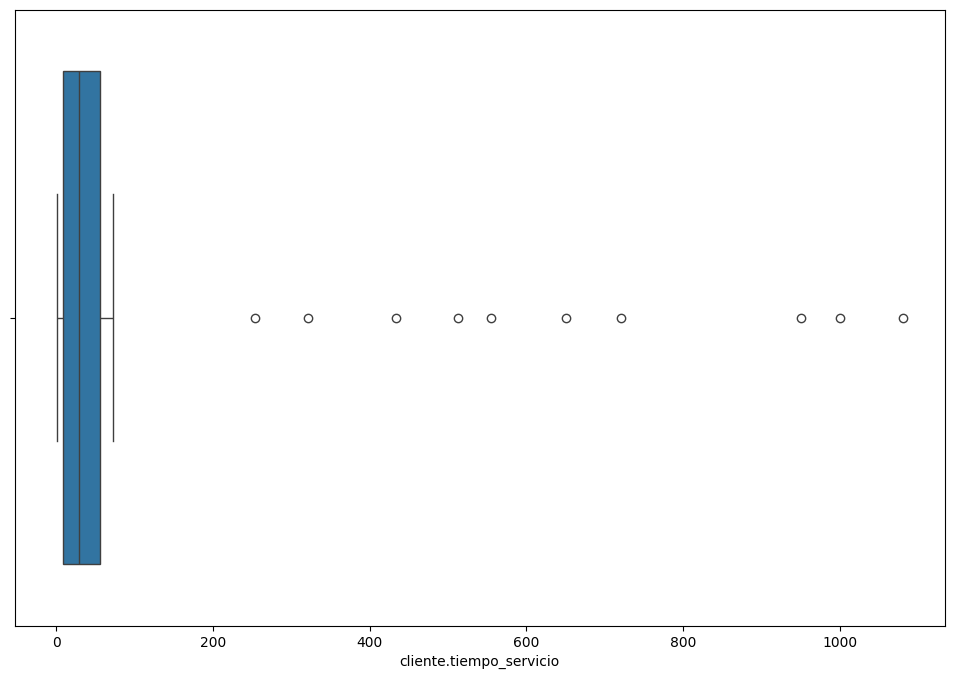

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.boxplot(x=datos_sin_nulo['cliente.tiempo_servicio'])
plt.show()

In [ ]:
q1 = datos_sin_nulo['cliente.tiempo_servicio'].quantile(.25)
q1

9.0

In [ ]:
q3 = datos_sin_nulo['cliente.tiempo_servicio'].quantile(.75)
q3

56.0

In [ ]:
iqr = q3 - q1
iqr

47.0

In [ ]:
lim_inferior = q1 - 1.5 * iqr
lim_inferior

-61.5

In [ ]:
lim_superior = q3 + 1.5 * iqr
lim_superior

126.5

In [ ]:
datos_sin_nulo[(datos_sin_nulo['cliente.tiempo_servicio'] < lim_inferior)|(datos_sin_nulo['cliente.tiempo_servicio'] > lim_superior)].shape[0]

10

In [ ]:
outliers = datos_sin_nulo[(datos_sin_nulo['cliente.tiempo_servicio'] < lim_inferior)|(datos_sin_nulo['cliente.tiempo_servicio'] > lim_superior)]

In [ ]:
outliers

,id_cliente,churn,cliente.genero,cliente.adulto_mayor,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.factura_eletronica,cuenta.metodo_pago,cuenta.cobranza.mensual,cuenta.cobranza.total
1945,2830-LEWOA,no,masculino,0,sí,sí,1080.0,sí,no,fibra óptica,no,sí,sí,sí,sí,sí,un año,no,tarjeta de crédito (automático),103.90,112212.00
1946,2831-EBWRN,no,masculino,0,no,no,1000.0,sí,no,DSL,no,no,no,no,no,no,mensual,sí,cheque electrónico,45.90,45900.00
1952,2834-SPCJV,sí,masculino,0,sí,no,950.0,sí,no,fibra óptica,sí,no,no,no,sí,no,mensual,no,cheque electrónico,84.10,79895.00
1956,2842-JTCCU,sí,masculino,0,no,no,254.0,sí,no,DSL,no,no,no,no,no,no,mensual,no,transferencia bancaria (automática),46.05,80.35
1958,2845-AFFTX,sí,masculino,1,sí,no,321.0,sí,sí,fibra óptica,no,no,sí,no,sí,sí,mensual,sí,cheque electrónico,99.80,4259.30
1963,2851-STERV,no,masculino,1,no,no,650.0,sí,no,DSL,no,no,sí,sí,sí,sí,un año,sí,cheque electrónico,73.00,47450.00
1966,2856-NNASM,sí,masculino,1,no,no,721.0,sí,no,fibra óptica,no,no,no,no,sí,sí,mensual,sí,cheque vía correo,89.55,3856.75
1970,2862-JVEOY,no,masculino,0,no,no,555.0,sí,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,un año,no,cheque vía correo,19.15,124.40
1973,2865-TCHJW,sí,femenino,1,no,no,433.0,sí,sí,fibra óptica,no,no,sí,no,sí,no,mensual,sí,cheque electrónico,89.20,346.20
1974,2866-IKBTM,no,femenino,0,no,no,512.0,sí,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,mensual,no,cheque vía correo,19.55,19.55


## 4.2 - Tratando los valores atípicos

In [ ]:
outliers[['cliente.tiempo_servicio','cuenta.cobranza.mensual','cuenta.cobranza.total']]

,cliente.tiempo_servicio,cuenta.cobranza.mensual,cuenta.cobranza.total
1945,1080.0,103.90,112212.00
1946,1000.0,45.90,45900.00
1952,950.0,84.10,79895.00
1956,254.0,46.05,80.35
1958,321.0,99.80,4259.30
1963,650.0,73.00,47450.00
1966,721.0,89.55,3856.75
1970,555.0,19.15,124.40
1973,433.0,89.20,346.20
1974,512.0,19.55,19.55


In [ ]:
filtro = (datos_sin_nulo['cliente.tiempo_servicio'] < lim_inferior)|(datos_sin_nulo['cliente.tiempo_servicio'] > lim_superior)

In [ ]:
datos_sin_outlier = datos_sin_nulo.copy()

In [ ]:
datos_sin_outlier[filtro]['cliente.tiempo_servicio']

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente.tiempo_servicio, dtype: float64

In [ ]:
datos_sin_outlier.loc[filtro,'cliente.tiempo_servicio'] = np.ceil(
        datos_sin_outlier['cuenta.cobranza.total']/datos_sin_outlier['cuenta.cobranza.mensual']
    )

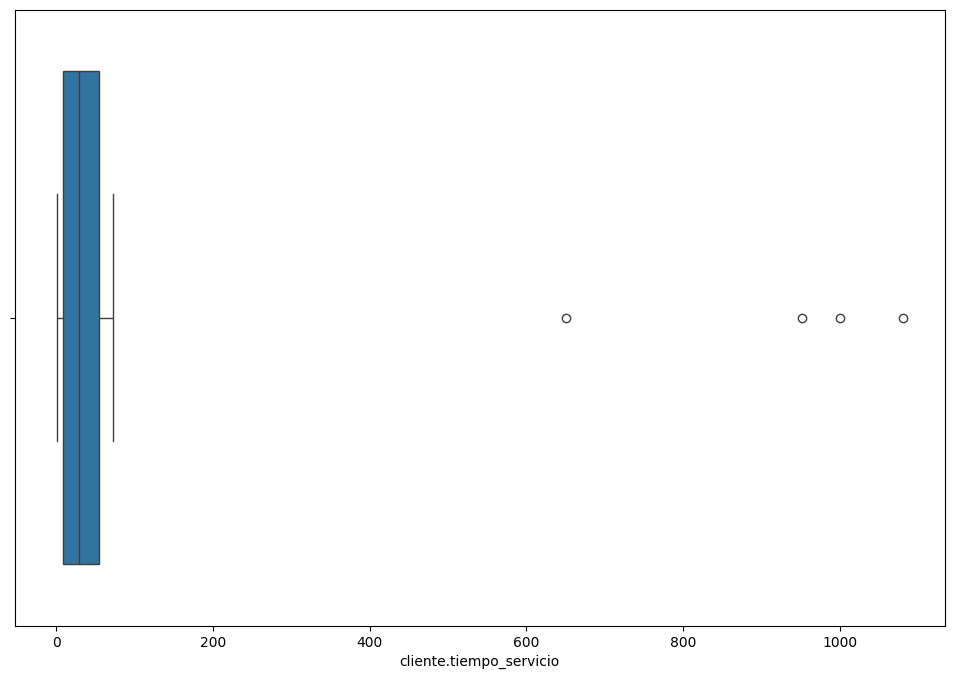

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x=datos_sin_outlier['cliente.tiempo_servicio'])
plt.show()

In [ ]:
q1 = datos_sin_outlier['cliente.tiempo_servicio'].quantile(.25)
q3 = datos_sin_outlier['cliente.tiempo_servicio'].quantile(.75)
iqr = q3 - q1
lim_superior = q3 + 1.5 * iqr
lim_inferior = q1 - 1.5 * iqr
filtro = (datos_sin_outlier['cliente.tiempo_servicio'] < lim_inferior)|(datos_sin_outlier['cliente.tiempo_servicio'] > lim_superior)

In [ ]:
datos_sin_outlier[filtro]['cliente.tiempo_servicio']

1945    1080.0
1946    1000.0
1952     951.0
1963     650.0
Name: cliente.tiempo_servicio, dtype: float64

## 4.3 - Removiendo los outliers

In [ ]:
datos_sin_outlier[filtro]

,id_cliente,churn,cliente.genero,cliente.adulto_mayor,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.factura_eletronica,cuenta.metodo_pago,cuenta.cobranza.mensual,cuenta.cobranza.total
1945,2830-LEWOA,no,masculino,0,sí,sí,1080.0,sí,no,fibra óptica,no,sí,sí,sí,sí,sí,un año,no,tarjeta de crédito (automático),103.9,112212.0
1946,2831-EBWRN,no,masculino,0,no,no,1000.0,sí,no,DSL,no,no,no,no,no,no,mensual,sí,cheque electrónico,45.9,45900.0
1952,2834-SPCJV,sí,masculino,0,sí,no,951.0,sí,no,fibra óptica,sí,no,no,no,sí,no,mensual,no,cheque electrónico,84.1,79895.0
1963,2851-STERV,no,masculino,1,no,no,650.0,sí,no,DSL,no,no,sí,sí,sí,sí,un año,sí,cheque electrónico,73.0,47450.0


In [ ]:
df = datos_sin_outlier[~filtro].reset_index(drop=True)
df

,id_cliente,churn,cliente.genero,cliente.adulto_mayor,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.factura_eletronica,cuenta.metodo_pago,cuenta.cobranza.mensual,cuenta.cobranza.total
0,0003-MKNFE,no,masculino,0,no,no,9.0,sí,sí,DSL,no,no,no,no,no,sí,mensual,no,cheque vía correo,59.90,542.40
1,0004-TLHLJ,sí,masculino,0,no,no,4.0,sí,no,fibra óptica,no,no,sí,no,no,no,mensual,sí,cheque electrónico,73.90,280.85
2,0011-IGKFF,sí,masculino,1,sí,no,13.0,sí,no,fibra óptica,no,sí,sí,no,sí,sí,mensual,sí,cheque electrónico,98.00,1237.85
3,0013-EXCHZ,sí,femenino,1,sí,no,3.0,sí,no,fibra óptica,no,no,no,sí,sí,no,mensual,sí,cheque vía correo,83.90,267.40
4,0013-MHZWF,no,femenino,0,no,sí,9.0,sí,no,DSL,no,no,no,sí,sí,sí,mensual,sí,tarjeta de crédito (automático),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,9987-LUTYD,no,femenino,0,no,no,13.0,sí,no,DSL,sí,no,no,sí,no,no,un año,no,cheque vía correo,55.15,742.90
6998,9992-RRAMN,sí,masculino,0,sí,no,22.0,sí,sí,fibra óptica,no,no,no,no,no,sí,mensual,sí,cheque electrónico,85.10,1873.70
6999,9992-UJOEL,no,masculino,0,no,no,2.0,sí,no,DSL,no,sí,no,no,no,no,mensual,sí,cheque vía correo,50.30,92.75
7000,9993-LHIEB,no,masculino,0,sí,sí,67.0,sí,no,DSL,sí,no,sí,sí,no,sí,dos años,no,cheque vía correo,67.85,4627.65


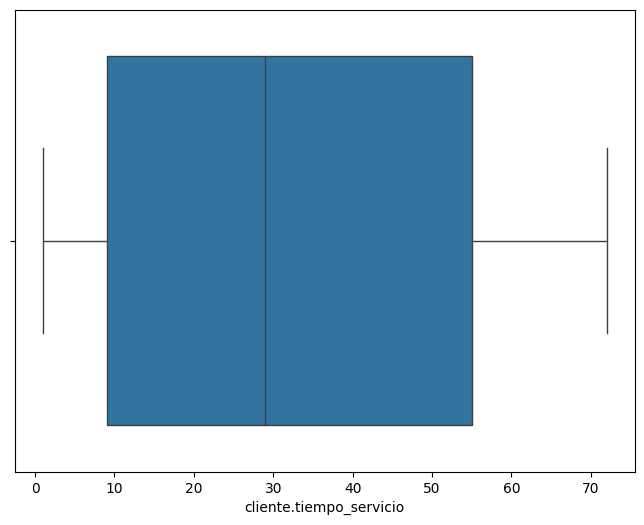

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['cliente.tiempo_servicio'])
plt.show()

## 5.1 - Sustituyendo las variables

## 5.2 - One Hot Encoding